# Preprocessing

In [ ]:
import os

data_dir = "/content/drive/MyDrive/kaggle_datasets"
os.listdir(data_dir)


['bank_fraud', 'fruit_det', 'apple', 'celeb-df-v2.zip', 'ff-c23.zip']

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/kaggle_datasets/celeb-df-v2.zip"
extract_dir = "/content/celeb-df-v2"

print("Extracting...")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Finished extracting to /content/celeb-df-v2/")

Extracting...
Finished extracting to /content/celeb-df-v2/


In [ ]:
import glob

real_files = glob.glob(os.path.join("/content/celeb-df-v2/Celeb-real", "*.mp4"))
fake_files = glob.glob(os.path.join("/content/celeb-df-v2/Celeb-synthesis", "*.mp4"))
yt_files   = glob.glob(os.path.join("/content/celeb-df-v2/YouTube-real", "*.mp4"))

print("Real videos:", len(real_files))
print("Fake videos:", len(fake_files))
print("YouTube real videos:", len(yt_files))

Real videos: 590
Fake videos: 5639
YouTube real videos: 300


In [ ]:
!pip install retina-face
!pip install facenet-pytorch
!apt-get install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import cv2
from tqdm import tqdm

video_root = "/content/celeb-df-v2"
frames_root = "/content/frames"
os.makedirs(frames_root, exist_ok=True)

# extract frame func
def extract_frames(video_path, save_dir, frame_skip=5):
    os.makedirs(save_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    idx = 0
    fidx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if idx % frame_skip == 0:
            cv2.imwrite(f"{save_dir}/frame_{fidx:05d}.jpg", frame)
            fidx += 1
        idx += 1
    cap.release()

# scan videos
video_paths = []
for root, dirs, files in os.walk(video_root):
    for file in files:
        if file.endswith(".mp4"):
            video_paths.append(os.path.join(root, file))

len(video_paths)

6529

In [ ]:
# extract frame
for vp in tqdm(video_paths):
    vid = os.path.splitext(os.path.basename(vp))[0]
    out_dir = os.path.join(frames_root, vid)
    extract_frames(vp, out_dir)

100%|██████████| 6529/6529 [36:08<00:00,  3.01it/s]


In [ ]:
# !zip -r /content/drive/MyDrive/kaggle_datasets/celebDFv2_frame.zip /content/frames

In [ ]:
# zip_path = "/content/drive/MyDrive/kaggle_datasets/celebDFv2_frame.zip"
# extract_dir = "/content/celebDFv2_frame"

# print("Extracting...")

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print("Finished extracting to /content/celebDFv2_frame")

Extracting...
Finished extracting to /content/celebDFv2_frame


In [ ]:
# zip_path = "/content/drive/MyDrive/kaggle_datasets/celeb-df-v2.zip"
# extract_dir = "/content/celeb-df-v2"

# print("Extracting...")

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print("Finished extracting to /content/celeb-df-v2")

Extracting...
Finished extracting to /content/celeb-df-v2


In [ ]:
test_list = {}
with open("/content/celeb-df-v2/List_of_testing_videos.txt", "r") as f:
    for line in f:
        label, path = line.strip().split()
        test_list[path] = int(label)

In [ ]:
import csv

DATASET_DIR = "/content/celeb-df-v2"
TEST_LIST_FILE = os.path.join(DATASET_DIR, "List_of_testing_videos.txt")

# load test list
test_dict = {}
with open(TEST_LIST_FILE, "r") as f:
    for line in f:
        label, path = line.strip().split()
        test_dict[path] = int(label)

# --- STEP 2: Create CSV writers ---
train_csv = open("train.csv", "w", newline='')
test_csv = open("test.csv", "w", newline='')
train_writer = csv.writer(train_csv)
test_writer = csv.writer(test_csv)

train_writer.writerow(["video_path", "label"])
test_writer.writerow(["video_path", "label"])

# --- STEP 3: Walk dataset ---
for root, _, files in os.walk(DATASET_DIR):
    for file in files:
        if not file.endswith(".mp4"):
            continue

        folder = os.path.basename(root)
        rel_path = f"{folder}/{file}"

        # Check if video is in official test split
        if rel_path in test_dict:
            test_writer.writerow([rel_path, test_dict[rel_path]])
        else:
            # Label by folder name
            if folder == "Celeb-synthesis":
                label = 0
            else:
                label = 1

            train_writer.writerow([rel_path, label])

train_csv.close()
test_csv.close()

print("train.csv and test.csv created!")

train.csv and test.csv created!


In [ ]:
import shutil
import pandas as pd

DATASET_DIR = "/content/celeb-df-v2/"
OUTPUT_DIR   = "/content/celeb-df-v2_split/"

os.makedirs(OUTPUT_DIR, exist_ok=True)

def process_split(csv_file, split_name):
    df = pd.read_csv(csv_file)

    for _, row in df.iterrows():
        rel_path = row["video_path"]
        label    = row["label"]

        src = os.path.join(DATASET_DIR, rel_path)
        dst_dir = os.path.join(OUTPUT_DIR, split_name, f"class_{label}")

        os.makedirs(dst_dir, exist_ok=True)

        dst = os.path.join(dst_dir, os.path.basename(rel_path))

        # Copy file
        shutil.copy2(src, dst)

        print(f"{split_name}: Copied {rel_path} → class_{label}")

process_split("train.csv", "train")
process_split("test.csv", "test")

Streaming output truncated to the last 5000 lines.
train: Copied Celeb-synthesis/id59_id61_0002.mp4 → class_0
train: Copied Celeb-synthesis/id37_id29_0009.mp4 → class_0
train: Copied Celeb-synthesis/id53_id52_0001.mp4 → class_0
train: Copied Celeb-synthesis/id19_id20_0006.mp4 → class_0
train: Copied Celeb-synthesis/id28_id9_0006.mp4 → class_0
train: Copied Celeb-synthesis/id29_id38_0000.mp4 → class_0
train: Copied Celeb-synthesis/id3_id30_0002.mp4 → class_0
train: Copied Celeb-synthesis/id47_id48_0005.mp4 → class_0
train: Copied Celeb-synthesis/id24_id27_0004.mp4 → class_0
train: Copied Celeb-synthesis/id0_id26_0005.mp4 → class_0
train: Copied Celeb-synthesis/id51_id54_0008.mp4 → class_0
train: Copied Celeb-synthesis/id37_id2_0003.mp4 → class_0
train: Copied Celeb-synthesis/id31_id35_0006.mp4 → class_0
train: Copied Celeb-synthesis/id28_id27_0005.mp4 → class_0
train: Copied Celeb-synthesis/id20_id21_0001.mp4 → class_0
train: Copied Celeb-synthesis/id48_id47_0005.mp4 → class_0
train: Co

## Face Extraction

In [ ]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 130.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 135.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 135.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from facenet_pytorch import MTCNN
import torch
import cv2
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

mtcnn = MTCNN(keep_all=False, device=device)  # GPU!!


Using device: cuda


In [ ]:
def extract_faces_gpu(video_path, save_dir, sample_rate=10):
    os.makedirs(save_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    frame_id = 0

    success, frame = cap.read()
    while success:
        if frame_id % sample_rate == 0:
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # detect face on GPU
            boxes, _ = mtcnn.detect(rgb)

            if boxes is not None:
                x1, y1, x2, y2 = boxes[0].astype(int)
                face = frame[y1:y2, x1:x2]
                if face.size > 0:
                    filename = os.path.basename(video_path).replace(".mp4", f"_{frame_id}.jpg")
                    cv2.imwrite(os.path.join(save_dir, filename), face)

        success, frame = cap.read()
        frame_id += 1

    cap.release()

In [ ]:
base_path = "/content/celeb-df-v2_split"
output_path = "/content/faces"

for cls in ["class_0", "class_1"]:
    video_dir = os.path.join(base_path, "train", cls)
    save_dir = os.path.join(output_path, "train", cls)

    videos = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]

    for v in tqdm(videos, desc=f"GPU Processing train/{cls}"):
        extract_faces_gpu(os.path.join(video_dir, v), save_dir)

for cls in ["class_0", "class_1"]:
    video_dir = os.path.join(base_path, "test", cls)
    save_dir = os.path.join(output_path, "test", cls)

    videos = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]

    for v in tqdm(videos, desc=f"GPU Processing test/{cls}"):
        extract_faces_gpu(os.path.join(video_dir, v), save_dir)


GPU Processing test/class_1: 100%|██████████| 178/178 [10:32<00:00,  3.55s/it]


In [ ]:
!zip -r /content/drive/MyDrive/kaggle_datasets/celebDFv2_faces.zip /content/faces

Streaming output truncated to the last 5000 lines.
  adding: content/faces/test/class_0/id10_id7_0001_90.jpg (deflated 2%)
  adding: content/faces/test/class_0/id26_id16_0001_300.jpg (deflated 3%)
  adding: content/faces/test/class_0/id1_id20_0001_240.jpg (deflated 3%)
  adding: content/faces/test/class_0/id4_id20_0001_130.jpg (deflated 2%)
  adding: content/faces/test/class_0/id2_id26_0001_10.jpg (deflated 2%)
  adding: content/faces/test/class_0/id1_id17_0007_230.jpg (deflated 2%)
  adding: content/faces/test/class_0/id21_id2_0000_80.jpg (deflated 2%)
  adding: content/faces/test/class_0/id20_id37_0004_140.jpg (deflated 1%)
  adding: content/faces/test/class_0/id16_id21_0002_70.jpg (deflated 3%)
  adding: content/faces/test/class_0/id4_id0_0004_20.jpg (deflated 2%)
  adding: content/faces/test/class_0/id29_id30_0009_20.jpg (deflated 4%)
  adding: content/faces/test/class_0/id53_id58_0005_440.jpg (deflated 2%)
  adding: content/faces/test/class_0/id1_id3_0003_280.jpg (deflated 3%)
  a

# Modelling

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class FaceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for label in ["class_0", "class_1"]:
            folder = os.path.join(root_dir, label)
            for img in os.listdir(folder):
                if img.endswith(".jpg"):
                    self.samples.append((os.path.join(folder, img), int(label[-1])))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
# !pip install facenet-pytorch torch torchvision matplotlib

import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights
from PIL import Image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# dataset class
class FaceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for label in ["class_0", "class_1"]:
            folder = os.path.join(root_dir, label)
            for img in os.listdir(folder):
                if img.endswith(".jpg"):
                    self.samples.append((os.path.join(folder, img), int(label[-1])))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

Using device: cuda


In [ ]:
# transform
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
# DataLoaders
train_dataset = FaceDataset("/content/faces/train", transform=train_transform)
test_dataset  = FaceDataset("/content/faces/test", transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [ ]:
model = efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # binary
model = model.to(device)

# Loss + Optimizer (with class weights for imbalance)
class_counts = [len(os.listdir("/content/faces/train/class_0")),
                len(os.listdir("/content/faces/train/class_1"))]
class_weights = [sum(class_counts)/c for c in class_counts]
weights = torch.tensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:01<00:00, 196MB/s]


In [ ]:
epochs = 10
train_losses, train_accs = [], []
val_losses, val_accs = [], []

# training loop
for epoch in range(epochs):
    model.train()
    running_loss, running_corrects, total = 0, 0, 0

    for imgs, labels in tqdm(train_loader, desc=f"Train Epoch {epoch+1}"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        preds = torch.argmax(outputs, dim=1)
        running_corrects += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc  = running_corrects / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)
            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc  = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f} | "
          f"Val Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f}")

Train Epoch 1: 100%|██████████| 7177/7177 [44:31<00:00,  2.69it/s]


Epoch 1/10 | Train Loss: 0.0684, Acc: 0.9746 | Val Loss: 0.0903, Acc: 0.9679


Train Epoch 2: 100%|██████████| 7177/7177 [45:06<00:00,  2.65it/s]


Epoch 2/10 | Train Loss: 0.0236, Acc: 0.9922 | Val Loss: 0.0461, Acc: 0.9844


Train Epoch 3: 100%|██████████| 7177/7177 [45:02<00:00,  2.66it/s]


Epoch 3/10 | Train Loss: 0.0168, Acc: 0.9942 | Val Loss: 0.0603, Acc: 0.9824


Train Epoch 4: 100%|██████████| 7177/7177 [45:09<00:00,  2.65it/s]


Epoch 4/10 | Train Loss: 0.0130, Acc: 0.9955 | Val Loss: 0.0507, Acc: 0.9878


Train Epoch 5: 100%|██████████| 7177/7177 [45:30<00:00,  2.63it/s]


Epoch 5/10 | Train Loss: 0.0112, Acc: 0.9960 | Val Loss: 0.0793, Acc: 0.9832


Train Epoch 6: 100%|██████████| 7177/7177 [45:30<00:00,  2.63it/s]


Epoch 6/10 | Train Loss: 0.0096, Acc: 0.9968 | Val Loss: 0.0777, Acc: 0.9793


Train Epoch 7: 100%|██████████| 7177/7177 [45:34<00:00,  2.62it/s]


Epoch 7/10 | Train Loss: 0.0086, Acc: 0.9971 | Val Loss: 0.0496, Acc: 0.9839


Train Epoch 8: 100%|██████████| 7177/7177 [45:38<00:00,  2.62it/s]


Epoch 8/10 | Train Loss: 0.0084, Acc: 0.9971 | Val Loss: 0.0684, Acc: 0.9855


Train Epoch 9: 100%|██████████| 7177/7177 [45:35<00:00,  2.62it/s]


Epoch 9/10 | Train Loss: 0.0075, Acc: 0.9974 | Val Loss: 0.0532, Acc: 0.9884


Train Epoch 10: 100%|██████████| 7177/7177 [45:32<00:00,  2.63it/s]


Epoch 10/10 | Train Loss: 0.0073, Acc: 0.9975 | Val Loss: 0.1125, Acc: 0.9755


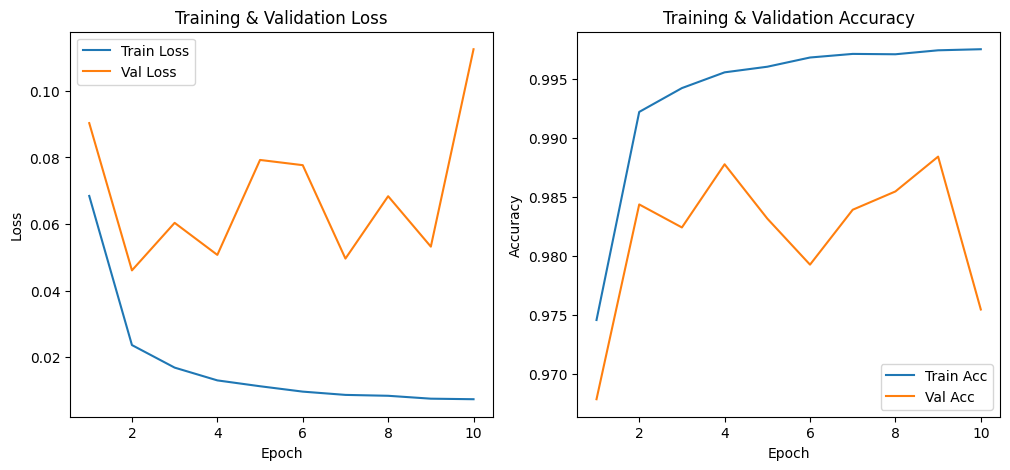

In [ ]:
plt.figure(figsize=(12,5))

# loss
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

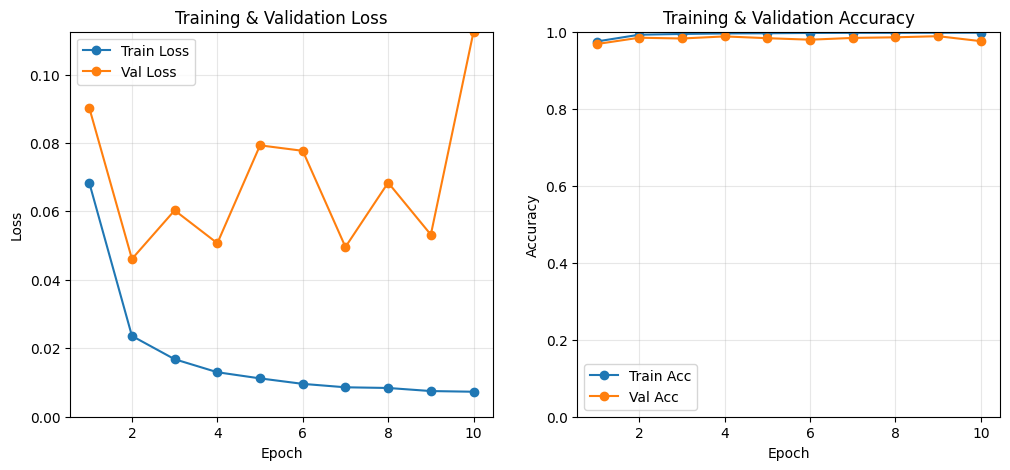

In [ ]:
# start from 0 (biar lebih smooth)
train_losses = [0.0684, 0.0236, 0.0168, 0.0130, 0.0112, 0.0096, 0.0086, 0.0084, 0.0075, 0.0073]
val_losses   = [0.0903, 0.0461, 0.0603, 0.0507, 0.0793, 0.0777, 0.0496, 0.0684, 0.0532, 0.1125]

train_accs = [0.9746, 0.9922, 0.9942, 0.9955, 0.9960, 0.9968, 0.9971, 0.9971, 0.9974, 0.9975]
val_accs   = [0.9679, 0.9844, 0.9824, 0.9878, 0.9832, 0.9793, 0.9839, 0.9855, 0.9884, 0.9755]

epochs = len(train_losses)

plt.figure(figsize=(12,5))

# loss
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses,   marker='o', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.ylim(0, max(max(train_losses), max(val_losses)))  # force start at 0
plt.grid(alpha=0.3)
plt.legend()

# accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, marker='o', label='Train Acc')
plt.plot(range(1, epochs+1), val_accs,   marker='o', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.ylim(0, 1)  # force start at 0
plt.grid(alpha=0.3)
plt.legend()

plt.show()


In [ ]:
drive_model_dir = '/content/drive/MyDrive/MyModel/celebdf_models'
os.makedirs(drive_model_dir, exist_ok=True)

In [ ]:
torch.save(model, os.path.join(drive_model_dir, 'efficientnetb7_baseline.pth'))

In [ ]:
torch.save(model.state_dict(), os.path.join(drive_model_dir, 'efficientnetb7_baseline_state.pth'))

# Evaluation

In [ ]:
import torch
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

# load model architecture
model = efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)
# model.load_state_dict(torch.load('/content/drive/MyDrive/celebdf_models/efficientnetb7_baseline_state.pth'))
model.load_state_dict(torch.load('/content/drive/MyDrive/MyModel/celebdf_models/efficientnetb7_baseline_state.pth'))
model = model.to(device)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormAct

## Frame-Level Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
f1  = f1_score(all_labels, all_preds)
cm  = confusion_matrix(all_labels, all_preds)

from sklearn.preprocessing import label_binarize
import numpy as np
all_labels_bin = label_binarize(all_labels, classes=[0,1])
all_preds_proba = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        probs = nn.Softmax(dim=1)(outputs)[:,1]  # probability for class 1
        all_preds_proba.extend(probs.cpu().numpy())

auc = roc_auc_score(all_labels_bin, all_preds_proba)

print("Test Accuracy:", acc)
print("Test F1-score:", f1)
print("Test AUC:", auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9754830978179457
Test F1-score: 0.9643660643007476
Test AUC: 0.9931977091659709
Confusion Matrix:
 [[12892    24]
 [  467  6644]]


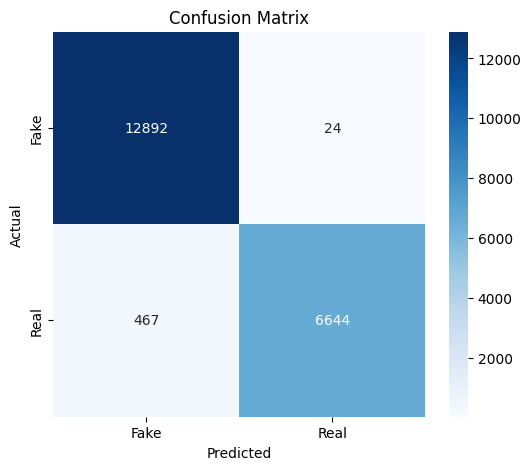

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Video-Level Evaluation

In [ ]:
import glob
from collections import defaultdict
from PIL import Image
from torchvision import transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

# transform
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_folder = "/content/faces/test"

# map video_id -> list of frame predictions
video_preds = defaultdict(list)
video_labels = {}

for cls in ["class_0","class_1"]:
    folder = os.path.join(test_folder, cls)
    for img_path in glob.glob(os.path.join(folder,"*.jpg")):
        video_id = "_".join(os.path.basename(img_path).split("_")[:-1])
        label = int(cls[-1])
        video_labels[video_id] = label

        img = Image.open(img_path).convert("RGB")
        img = test_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(img)
            prob = nn.Softmax(dim=1)(output)[:,1].item()  # probability for class 1
            video_preds[video_id].append(prob)

# aggregate predictions per video (average)
video_pred_labels = []
video_true_labels = []

for video_id, probs in video_preds.items():
    avg_prob = np.mean(probs)
    pred_label = 1 if avg_prob > 0.5 else 0
    video_pred_labels.append(pred_label)
    video_true_labels.append(video_labels[video_id])

acc = accuracy_score(video_true_labels, video_pred_labels)
f1  = f1_score(video_true_labels, video_pred_labels)
cm  = confusion_matrix(video_true_labels, video_pred_labels)

video_labels_bin = label_binarize(video_true_labels, classes=[0,1])
auc = roc_auc_score(video_labels_bin, [np.mean(video_preds[v]) for v in video_preds])

print("Video-level Accuracy:", acc)
print("Video-level F1-score:", f1)
print("Video-level AUC:", auc)
print("Video-level Confusion Matrix:\n", cm)

Video-level Accuracy: 0.9864864864864865
Video-level F1-score: 0.9799426934097422
Video-level AUC: 0.9998017184401851
Video-level Confusion Matrix:
 [[340   0]
 [  7 171]]


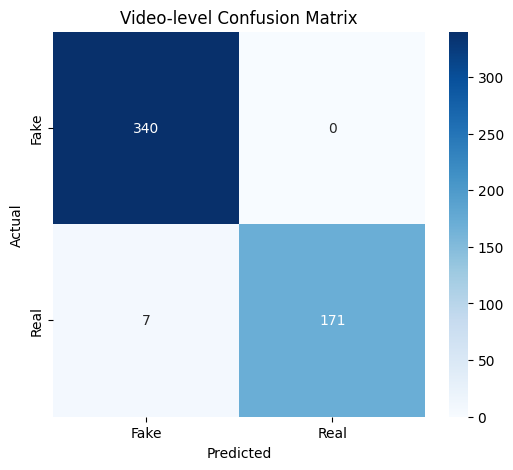

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Video-level Confusion Matrix')
plt.show()

# Cross-Dataset Validation (FaceForensic++)

In [ ]:
!pip install gdown

In [ ]:
# download dataset crop wajah FF++ Mas Ariq
import gdown

file_id = "1XCMpVnTIenJLAO9TSlgZxL3eBlB8rNTi"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "ffplus.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XCMpVnTIenJLAO9TSlgZxL3eBlB8rNTi
From (redirected): https://drive.google.com/uc?id=1XCMpVnTIenJLAO9TSlgZxL3eBlB8rNTi&confirm=t&uuid=ce03913a-60fc-4541-9ece-ac20ecb7b3c1
To: /content/ffplus.zip
100%|██████████| 2.96G/2.96G [00:34<00:00, 85.9MB/s]


'ffplus.zip'

In [ ]:
!mv /content/ffplus.zip /content/drive/MyDrive/kaggle_datasets

In [ ]:
import zipfile

zip_path = "/content/ffplus.zip"
extract_dir = "/content/ffplusFace"

print("Extracting...")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Extracting...


In [ ]:
import os
import glob
import numpy as np
from PIL import Image
from collections import defaultdict

import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

device = "cuda" if torch.cuda.is_available() else "cpu"

test_root = "/content/ffplusFace/Datasets/valid"

In [ ]:
import torch
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

# Recreate model architecture
model = efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)
# model.load_state_dict(torch.load('/content/drive/MyDrive/celebdf_models/efficientnetb7_baseline_state.pth'))
model.load_state_dict(torch.load('/content/drive/MyDrive/MyModel/celebdf_models/efficientnetb7_baseline_state.pth'))
model = model.to(device)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormAct

In [ ]:
import os
import glob
from collections import defaultdict
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

## Frame Level Evaluation

In [ ]:
frame_preds = []
frame_labels = []

fake_dir = "/content/ffplusFace/Datasets/valid/fake"
real_dir = "/content/ffplusFace/Datasets/valid/real"

for cls_dir, label in [(fake_dir, 0), (real_dir, 1)]:
    for img_path in glob.glob(os.path.join(cls_dir, "*.png")):

        img = Image.open(img_path).convert("RGB")
        img = test_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(img)
            prob_real = nn.Softmax(dim=1)(output)[:,1].item()  # class 1 = real

        pred_label = 1 if prob_real > 0.5 else 0

        frame_preds.append(pred_label)
        frame_labels.append(label)

In [ ]:
acc = accuracy_score(frame_labels, frame_preds)
f1  = f1_score(frame_labels, frame_preds)
auc = roc_auc_score(frame_labels, [float(p) for p in frame_preds])
cm  = confusion_matrix(frame_labels, frame_preds)

print("FRAME Accuracy:", acc)
print("FRAME F1-score:", f1)
print("FRAME AUC:", auc)
print("FRAME Confusion Matrix:\n", cm)

FRAME Accuracy: 0.6628292198111645
FRAME F1-score: 0.7396226415094339
FRAME AUC: 0.67155674888847
FRAME Confusion Matrix:
 [[2221 3984]
 [  87 5782]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

acc = accuracy_score(frame_labels, frame_preds)
f1  = f1_score(frame_labels, frame_preds)
auc = roc_auc_score(frame_labels, [float(p) for p in frame_preds])
cm  = confusion_matrix(frame_labels, frame_preds)

print("===== FRAME-LEVEL METRICS =====")
print("Accuracy:", acc)
print("F1-score:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

target_names = ["Fake (0)", "Real (1)"]
print("\nClassification Report:")
print(classification_report(frame_labels, frame_preds, target_names=target_names))

===== FRAME-LEVEL METRICS =====
Accuracy: 0.6628292198111645
F1-score: 0.7396226415094339
AUC: 0.67155674888847
Confusion Matrix:
 [[2221 3984]
 [  87 5782]]

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.96      0.36      0.52      6205
    Real (1)       0.59      0.99      0.74      5869

    accuracy                           0.66     12074
   macro avg       0.78      0.67      0.63     12074
weighted avg       0.78      0.66      0.63     12074



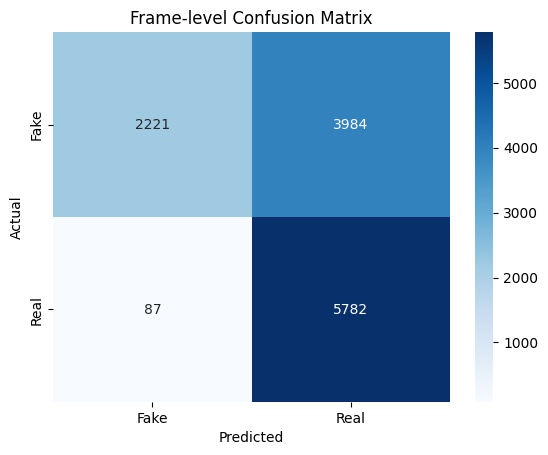

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','Real'],
            yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Frame-level Confusion Matrix")
plt.show()

## Video Level Evaluation

In [ ]:
video_preds = defaultdict(list)
video_labels = {}

fake_dir = "/content/ffplusFace/Datasets/valid/fake"
real_dir = "/content/ffplusFace/Datasets/valid/real"

for cls_dir, label in [(fake_dir, 0), (real_dir, 1)]:
    for img_path in glob.glob(os.path.join(cls_dir, "*.png")):

        file = os.path.basename(img_path)
        video_id = "_".join(file.split("_")[:-1])  # remove frame index

        video_labels[video_id] = label

        img = Image.open(img_path).convert("RGB")
        img = test_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(img)
            prob_real = nn.Softmax(dim=1)(output)[:,1].item()  # prob REAL

        video_preds[video_id].append(prob_real)

In [ ]:
video_pred_labels = []
video_true_labels = []

for vid, probs in video_preds.items():
    avg_real_prob = np.mean(probs)
    pred_label = 1 if avg_real_prob > 0.5 else 0

    video_pred_labels.append(pred_label)
    video_true_labels.append(video_labels[vid])

In [ ]:
acc = accuracy_score(video_true_labels, video_pred_labels)
f1  = f1_score(video_true_labels, video_pred_labels)
auc = roc_auc_score(video_true_labels,
                    [np.mean(video_preds[v]) for v in video_preds])
cm  = confusion_matrix(video_true_labels, video_pred_labels)

print("VIDEO Accuracy:", acc)
print("VIDEO F1-score:", f1)
print("VIDEO AUC:", auc)
print("VIDEO Confusion Matrix:\n", cm)

target_names = ["Fake (0)", "Real (1)"]
print("\nClassification Report:")
print(classification_report(video_true_labels, video_pred_labels, target_names=target_names))

VIDEO Accuracy: 0.6540362438220758
VIDEO F1-score: 0.7348484848484849
VIDEO AUC: 0.9075673620165146
VIDEO Confusion Matrix:
 [[106 206]
 [  4 291]]

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.96      0.34      0.50       312
    Real (1)       0.59      0.99      0.73       295

    accuracy                           0.65       607
   macro avg       0.77      0.66      0.62       607
weighted avg       0.78      0.65      0.62       607



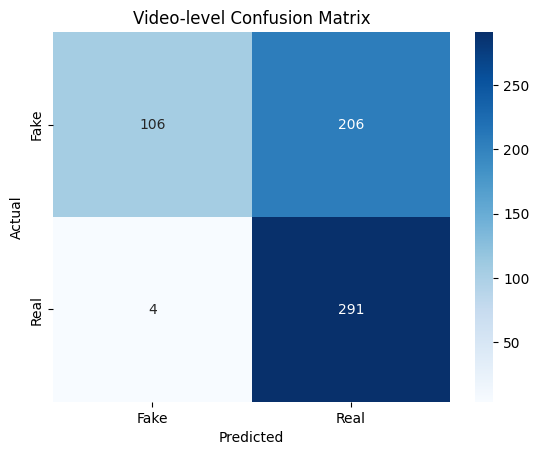

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','Real'],
            yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Video-level Confusion Matrix")
plt.show()